In [128]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [129]:

url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
print(soup)

<!DOCTYPE html>

<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=7" http-equiv="X-UA-Compatible"/>
<meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="0" http-equiv="Expires"/>
<meta content="300" http-equiv="refresh"/>
<!-- Bootstrap CSS -->
<link href="css/bootstrap.min.css" rel="stylesheet"/>
<link href="css/custom.css" rel="stylesheet"/>
<link href="css/responsive.css" rel="stylesheet"/>
<link href="css/font.css" rel="stylesheet"/>
<link href="img/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<title>Election Commission of India</title>
<style type="text/css">
</style>
<script>!function(a){var e="https://s.go-mpulse.net/boomerang/",t="addEventListener";if("False"=="True")a.BOOMR_config=a.BOOMR_con

In [130]:

links = soup.find_all('a')
for link in links:
  print(link.get('href'))

index.htm
index.htm
hi/index.htm

#
https://results.eci.gov.in/AcResultGenJune2024/index.htm
https://results.eci.gov.in/AcResultByeJune2024/index.htm
partywisewinresultState-369.htm
partywisewinresultState-742.htm
partywisewinresultState-1680.htm
partywisewinresultState-140.htm
partywisewinresultState-582.htm
partywisewinresultState-1745.htm
partywisewinresultState-805.htm
partywisewinresultState-3369.htm
partywisewinresultState-3620.htm
partywisewinresultState-3529.htm
partywisewinresultState-3165.htm
partywisewinresultState-1888.htm
partywisewinresultState-1420.htm
partywisewinresultState-547.htm
partywisewinresultState-772.htm
partywisewinresultState-1.htm
partywisewinresultState-852.htm
partywisewinresultState-860.htm
partywisewinresultState-545.htm
partywisewinresultState-804.htm
partywisewinresultState-1847.htm
partywisewinresultState-544.htm
partywisewinresultState-1458.htm
partywisewinresultState-834.htm
partywisewinresultState-1998.htm
partywisewinresultState-83.htm
partywisew

In [131]:
table = soup.find('table')
first_tr_in_table = table.find('tr')
print(first_tr_in_table)

<tr>
<th style="text-align: left;">Party</th>
<th style="text-align:right">Won</th>
<th style="text-align:right">Leading</th>
<th style="text-align:right">Total</th>
</tr>


In [132]:
header_values = [th.text.strip() for th in first_tr_in_table.find_all('th')]
df = pd.DataFrame(columns=header_values)
print(df)

Empty DataFrame
Columns: [Party, Won, Leading, Total]
Index: []


In [133]:
all_trs = soup.find_all('tr')[1:]
all_trs

[<tr class="tr">
 <td style="text-align:left">Bharatiya Janata Party - BJP</td>
 <td style="text-align:right">
 <a href="partywisewinresultState-369.htm">240</a>
 </td>
 <td style="text-align:right">
                                                                                         0
                                                                                     </td>
 <td style="text-align:right">240</td>
 </tr>,
 <tr class="tr">
 <td style="text-align:left">Indian National Congress - INC</td>
 <td style="text-align:right">
 <a href="partywisewinresultState-742.htm">99</a>
 </td>
 <td style="text-align:right">
                                                                                         0
                                                                                     </td>
 <td style="text-align:right">99</td>
 </tr>,
 <tr class="tr">
 <td style="text-align:left">Samajwadi Party - SP</td>
 <td style="text-align:right">
 <a href="partywisewinresultState-1680.

In [134]:
table_rows = soup.find_all('tr')[1:]
for row in table_rows:
    row_data = [cell.text.strip() for cell in row.find_all('td')]
    if len(row_data) == len(df.columns):
      df.loc[len(df.index)] = row_data

print(df)


                                                Party  Won Leading Total
0                        Bharatiya Janata Party - BJP  240       0   240
1                      Indian National Congress - INC   99       0    99
2                                Samajwadi Party - SP   37       0    37
3                 All India Trinamool Congress - AITC   29       0    29
4                     Dravida Munnetra Kazhagam - DMK   22       0    22
5                                  Telugu Desam - TDP   16       0    16
6                        Janata Dal  (United) - JD(U)   12       0    12
7      Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT    9       0     9
8   Nationalist Congress Party – Sharadchandra Paw...    8       0     8
9                                     Shiv Sena - SHS    7       0     7
10             Lok Janshakti Party(Ram Vilas) - LJPRV    5       0     5
11      Yuvajana Sramika Rythu Congress Party - YSRCP    4       0     4
12                         Rashtriya Janata Dal - R

In [135]:
table_body = soup.find('tbody')
total_trs = len(table_body.find_all('tr')) if table_body else 0
total_trs

42

In [136]:
csv_filename = 'election_results.csv'

df.to_csv(csv_filename, index=False)

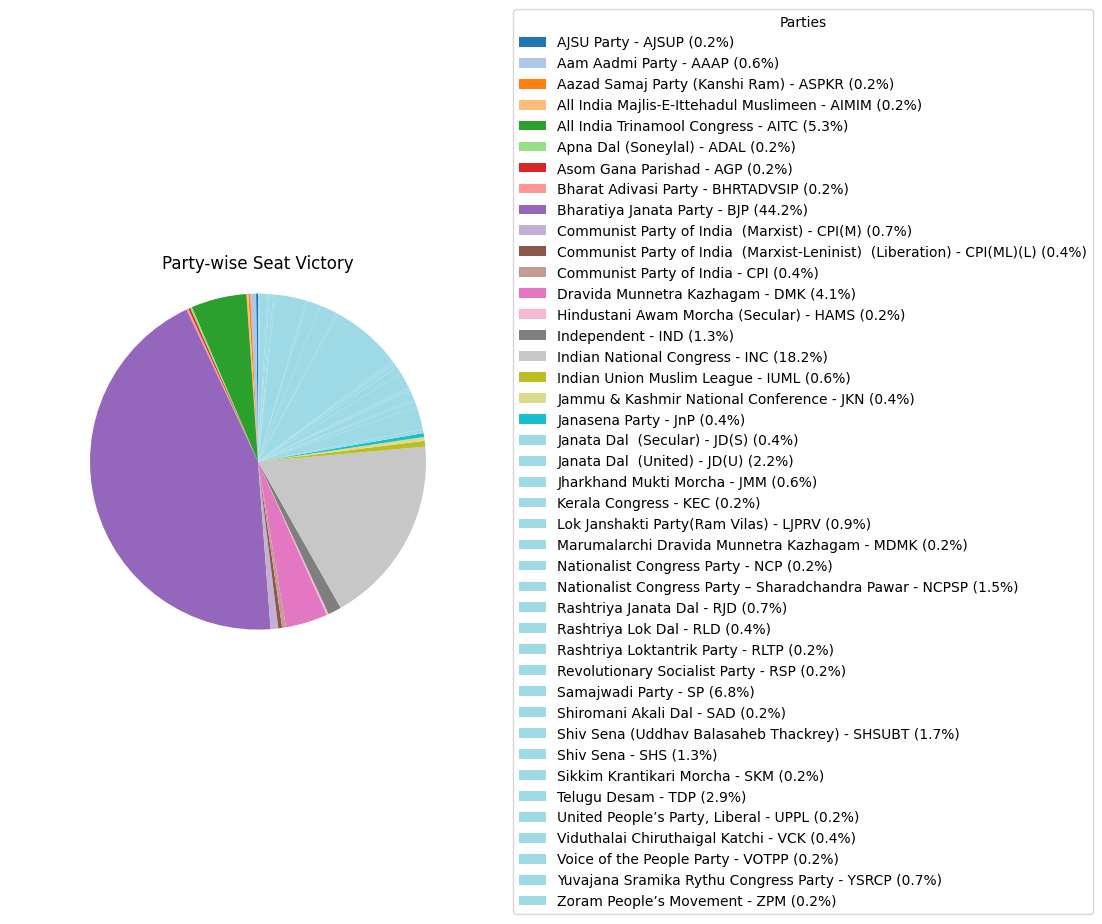

In [137]:
import matplotlib.pyplot as plt
df['Won'] = df['Won'].astype(int)

party_seats = df.groupby('Party')['Won'].sum()
colors = plt.cm.tab20(range(len(party_seats)))

plt.pie(party_seats, autopct='', startangle=90, colors=colors)
plt.title('Party-wise Seat Victory')
plt.axis('equal')

labels = [f"{party} ({percentage:.1f}%)" for party, percentage in zip(party_seats.index, party_seats / party_seats.sum() * 100)]

plt.legend(labels, title="Parties", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [138]:
party_win_pct = df.groupby('Party').agg({'Won': 'sum', 'Total': 'sum'})
party_win_pct['Total'] = party_win_pct['Total'].astype(int)
party_win_pct['Win Percentage'] = (party_win_pct['Won'] / party_win_pct['Total']) * 100
print(party_win_pct)

                                                    Won  Total  Win Percentage
Party                                                                         
AJSU Party - AJSUP                                    1      1           100.0
Aam Aadmi Party - AAAP                                3      3           100.0
Aazad Samaj Party (Kanshi Ram) - ASPKR                1      1           100.0
All India Majlis-E-Ittehadul Muslimeen - AIMIM        1      1           100.0
All India Trinamool Congress - AITC                  29     29           100.0
Apna Dal (Soneylal) - ADAL                            1      1           100.0
Asom Gana Parishad - AGP                              1      1           100.0
Bharat Adivasi Party - BHRTADVSIP                     1      1           100.0
Bharatiya Janata Party - BJP                        240    240           100.0
Communist Party of India  (Marxist) - CPI(M)          4      4           100.0
Communist Party of India  (Marxist-Leninist)  (...  

In [139]:
total_seats_won = df['Won'].sum()
party_win_pct['Seat Share'] = (party_win_pct['Won'] / total_seats_won) * 100
print(party_win_pct)

                                                    Won  Total  \
Party                                                            
AJSU Party - AJSUP                                    1      1   
Aam Aadmi Party - AAAP                                3      3   
Aazad Samaj Party (Kanshi Ram) - ASPKR                1      1   
All India Majlis-E-Ittehadul Muslimeen - AIMIM        1      1   
All India Trinamool Congress - AITC                  29     29   
Apna Dal (Soneylal) - ADAL                            1      1   
Asom Gana Parishad - AGP                              1      1   
Bharat Adivasi Party - BHRTADVSIP                     1      1   
Bharatiya Janata Party - BJP                        240    240   
Communist Party of India  (Marxist) - CPI(M)          4      4   
Communist Party of India  (Marxist-Leninist)  (...    2      2   
Communist Party of India - CPI                        2      2   
Dravida Munnetra Kazhagam - DMK                      22     22   
Hindustani

In [140]:
# Convert 'Won' and 'Leading' columns to numeric type, handling non-numeric values
df['Won'] = pd.to_numeric(df['Won'], errors='coerce')
df['Leading'] = pd.to_numeric(df['Leading'], errors='coerce')

# Fill any missing values (NaN) created during conversion with 0
df['Won'] = df['Won'].fillna(0).astype(int)  # Fill NaN with 0 and convert to integer
df['Leading'] = df['Leading'].fillna(0).astype(int)  # Fill NaN with 0 and convert to integer

df['Close Contest'] = df['Leading'] > (df['Won'] * 2)  # Define a threshold for close contests
close_contest_performance = df[df['Close Contest']].groupby('Party')['Won'].sum()
close_contest_performance

Series([], Name: Won, dtype: int64)

In [141]:
party_wise_result_links = []
links = soup.find_all('a')
for link in links:
    href = link.get('href')
    if href and "partywisewinresultState" in href:
        party_wise_result_links.append(href)

print(party_wise_result_links)


['partywisewinresultState-369.htm', 'partywisewinresultState-742.htm', 'partywisewinresultState-1680.htm', 'partywisewinresultState-140.htm', 'partywisewinresultState-582.htm', 'partywisewinresultState-1745.htm', 'partywisewinresultState-805.htm', 'partywisewinresultState-3369.htm', 'partywisewinresultState-3620.htm', 'partywisewinresultState-3529.htm', 'partywisewinresultState-3165.htm', 'partywisewinresultState-1888.htm', 'partywisewinresultState-1420.htm', 'partywisewinresultState-547.htm', 'partywisewinresultState-772.htm', 'partywisewinresultState-1.htm', 'partywisewinresultState-852.htm', 'partywisewinresultState-860.htm', 'partywisewinresultState-545.htm', 'partywisewinresultState-804.htm', 'partywisewinresultState-1847.htm', 'partywisewinresultState-544.htm', 'partywisewinresultState-1458.htm', 'partywisewinresultState-834.htm', 'partywisewinresultState-1998.htm', 'partywisewinresultState-83.htm', 'partywisewinresultState-664.htm', 'partywisewinresultState-911.htm', 'partywisew

In [148]:

full_link = "https://results.eci.gov.in/PcResultGenJune2024/" + party_wise_result_links[0]
response = requests.get(full_link)
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', class_="table table-striped table-bordered")
if table:
  th_elements = table.find_all('th')
  for th in th_elements:
    print(th.text.strip())


S.No
Parliament Constituency
Winning Candidate
Total Votes
Margin


In [150]:

if table:
  th_elements = table.find_all('th')
  th_values = [th.text.strip() for th in th_elements]
  df_th = pd.DataFrame(columns=th_values)

print(df_th)

Empty DataFrame
Columns: [S.No, Parliament Constituency, Winning Candidate, Total Votes, Margin]
Index: []


In [151]:

  tbody = table.find('tbody')

  tr_elements = tbody.find_all('tr') if tbody else []
  for tr in tr_elements:
      print(tr.text.strip())


1
Anakapalle(5)
C.M.RAMESH
762069
296530
2
Rajahmundry(8)
DAGGUBATI PURANDHESHWARI
726515
239139
3
Narsapuram(9)
BHUPATHI RAJU SRINIVASA VARMA (B.J.P.VARMA)
707343
276802
4
Arunachal West(1)
KIREN RIJIJU
205417
100738
5
Arunachal East(2)
TAPIR GAO
145581
30421
6
Darrang-Udalguri(4)
DILIP SAIKIA
868387
329012
7
Guwahati(5)
BIJULI KALITA MEDHI
894887
251090
8
Diphu(6)
AMARSING TISSO
334620
147603
9
Karimganj(7)
KRIPANATH MALLAH
545093
18360
10
Silchar (8)
PARIMAL SUKLABAIDYA
652405
264311
11
Kaziranga(10)
KAMAKHYA PRASAD TASA
897043
248947
12
Sonitpur(11)
RANJIT DUTTA
775788
361408
13
Lakhimpur(12)
PRADAN BARUAH
663122
201257
14
Dibrugarh(13)
SARBANANDA SONOWAL
693762
279321
15
Paschim Champaran(2)
DR.SANJAY JAISWAL
580421
136568
16
Purvi Champaran(3)
RADHA MOHAN SINGH
542193
88287
17
Madhubani(6)
ASHOK KUMAR YADAV
553428
151945
18
Araria(9)
PRADEEP KUMAR SINGH
600146
20094
19
Darbhanga(14)
GOPAL JEE THAKUR
566630
178156
20
Muzaffarpur(15)
RAJ BHUSHAN CHOUDHARY
619749
234927
21
Maharajga

In [152]:
for tr in tr_elements:
    row_data = [td.text.strip() for td in tr.find_all('td')]
    if len(row_data) == len(df_th.columns):
        df_th.loc[len(df_th.index)] = row_data

print(df_th)


    S.No Parliament Constituency                            Winning Candidate  \
0      1           Anakapalle(5)                                   C.M.RAMESH   
1      2          Rajahmundry(8)                     DAGGUBATI PURANDHESHWARI   
2      3           Narsapuram(9)  BHUPATHI RAJU SRINIVASA VARMA (B.J.P.VARMA)   
3      4       Arunachal West(1)                                 KIREN RIJIJU   
4      5       Arunachal East(2)                                    TAPIR GAO   
..   ...                     ...                                          ...   
235  236     North-West Delhi(5)                          YOGENDER CHANDOLIYA   
236  237           West Delhi(6)                           KAMALJEET SEHRAWAT   
237  238          South Delhi(7)                         RAMVIR SINGH BIDHURI   
238  239             UDHAMPUR(4)                            DR JITENDRA SINGH   
239  240                JAMMU(5)                                JUGAL KISHORE   

    Total Votes  Margin  
0

In [153]:

df_th['Margin'] = pd.to_numeric(df_th['Margin'], errors='coerce')
df_th['Total Votes'] = pd.to_numeric(df_th['Total Votes'], errors='coerce')
df_th['Margin_Percentage'] = (df_th['Margin'] / df_th['Total Votes']) * 100

In [154]:
winning_candidate_stats = df_th.groupby('Winning Candidate').agg({'Margin_Percentage': 'mean', 'Total Votes': 'mean'})
print(winning_candidate_stats)

                                         Margin_Percentage  Total Votes
Winning Candidate                                                      
ABHIJIT GANGOPADHYAY                             10.153425     765584.0
ADHIKARI SOUMENDU                                 6.258427     763195.0
AJAY BHATT                                       43.297600     772671.0
AJAY TAMTA                                       54.546831     429167.0
ALOK SHARMA                                      51.115523     981109.0
...                                                    ...          ...
VISHNU DAYAL RAM                                 37.489778     770362.0
VISHWESHWAR HEGDE KAGERI                         43.122065     782495.0
VIVEK THAKUR                                     16.480439     410608.0
YADUVEER KRISHNADATTA CHAMARAJA WADIYAR          17.506156     795503.0
YOGENDER CHANDOLIYA                              33.566614     866483.0

[240 rows x 2 columns]


In [155]:
highest_turnout = df_th.nlargest(5, 'Total Votes')
lowest_turnout = df_th.nsmallest(5, 'Total Votes')
print(highest_turnout)
print(lowest_turnout)

    S.No Parliament Constituency      Winning Candidate  Total Votes  \
104  105              INDORE(26)        SHANKAR LALWANI    1226751.0   
96    97             VIDISHA(18)  SHIVRAJ SINGH CHOUHAN    1116460.0   
73    74     Bangalore Rural(23)       DR C N MANJUNATH    1079002.0   
204  205               RAIPUR(8)      BRIJMOHAN AGRAWAL    1050351.0   
50    51             Navsari(25)              C R PATIL    1031065.0   

        Margin  Margin_Percentage  
104  1175092.0          95.788958  
96    821408.0          73.572542  
73    269647.0          24.990408  
204   575285.0          54.770739  
50    773551.0          75.024465  
    S.No       Parliament Constituency         Winning Candidate  Total Votes  \
229  230  Andaman & Nicobar Islands(1)           BISHNU PADA RAY     102436.0   
230  231       Dadar & Nagar Haveli(2)  DELKAR KALABEN MOHANBHAI     121074.0   
4      5             Arunachal East(2)                 TAPIR GAO     145581.0   
3      4             Arunac

In [156]:
most_competitive = df_th.nsmallest(5, 'Margin')
print(most_competitive)

    S.No Parliament Constituency        Winning Candidate  Total Votes  \
124  125               Jajpur(8)  RABINDRA NARAYAN BEHERA     534239.0   
138  139         JAIPUR RURAL(6)       RAO RAJENDRA SINGH     617877.0   
207  208              KANKER(11)              BHOJRAJ NAG     597624.0   
170  171         Farrukhabad(40)            MUKESH RAJPUT     487963.0   
183  184            Bansgaon(67)           KAMLESH PASWAN     428693.0   

     Margin  Margin_Percentage  
124  1587.0           0.297058  
138  1615.0           0.261379  
207  1884.0           0.315248  
170  2678.0           0.548812  
183  3150.0           0.734792  


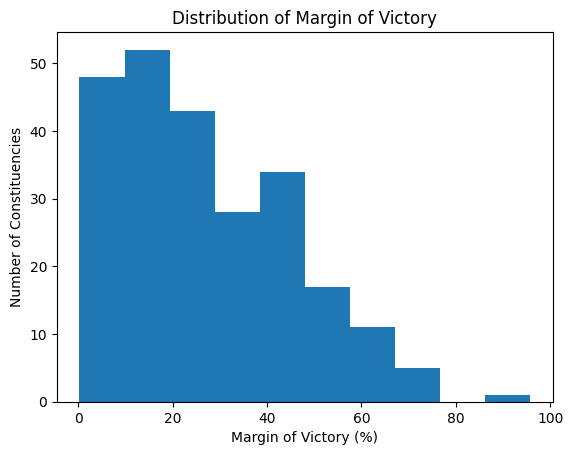

In [157]:

plt.hist(df_th['Margin_Percentage'])
plt.xlabel('Margin of Victory (%)')
plt.ylabel('Number of Constituencies')
plt.title('Distribution of Margin of Victory')
plt.show()

In [158]:
csv_filename = 'PartyWiseResult.csv'
df_th.to_csv(csv_filename, index=False)
print(f"DataFrame saved to {csv_filename}")


DataFrame saved to PartyWiseResult.csv


In [159]:
# prompt: analysis of this url "https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S24.htm"
urlup = "https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S24.htm"
response = requests.get(urlup)
soup = BeautifulSoup(response.content, 'html.parser')
soup



<!DOCTYPE html>

<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=7" http-equiv="X-UA-Compatible"/>
<meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="0" http-equiv="Expires"/>
<meta content="300" http-equiv="refresh"/>
<!-- Bootstrap CSS -->
<link href="css/bootstrap.min.css" rel="stylesheet"/>
<link href="css/custom.css" rel="stylesheet"/>
<link href="css/responsive.css" rel="stylesheet"/>
<link href="css/font.css" rel="stylesheet"/>
<link href="img/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link crossorigin="" href="css/leaflet.css" integrity="sha256-kLaT2GOSpHechhsozzB+flnD+zUyjE2LlfWPgU04xyI=" rel="stylesheet">
<script crossorigin="" integrity="sha256-WBkoXOwTeyKclOHuWtc+i2uENFpDZ9YPdf5Hf+D7

In [160]:

table = soup.find('table', class_="table")
if table:
  th_elements = table.find('tr').find_all('th')
  header_values = [th.text.strip() for th in th_elements]
  df_up = pd.DataFrame(columns=header_values)
  print(df_up)


Empty DataFrame
Columns: [Party, Won, Leading, Total]
Index: []


In [161]:


tbody = table.find('tbody')
tr_elements = tbody.find_all('tr') if tbody else []
for tr in tr_elements:
  row_data = [td.text.strip() for td in tr.find_all('td')]
  if len(row_data) == len(df_up.columns):
    df_up.loc[len(df_up.index)] = row_data

print(df_up)


                                    Party Won Leading Total
0                    Samajwadi Party - SP  37       0    37
1            Bharatiya Janata Party - BJP  33       0    33
2          Indian National Congress - INC   6       0     6
3                 Rashtriya Lok Dal - RLD   2       0     2
4  Aazad Samaj Party (Kanshi Ram) - ASPKR   1       0     1
5              Apna Dal (Soneylal) - ADAL   1       0     1


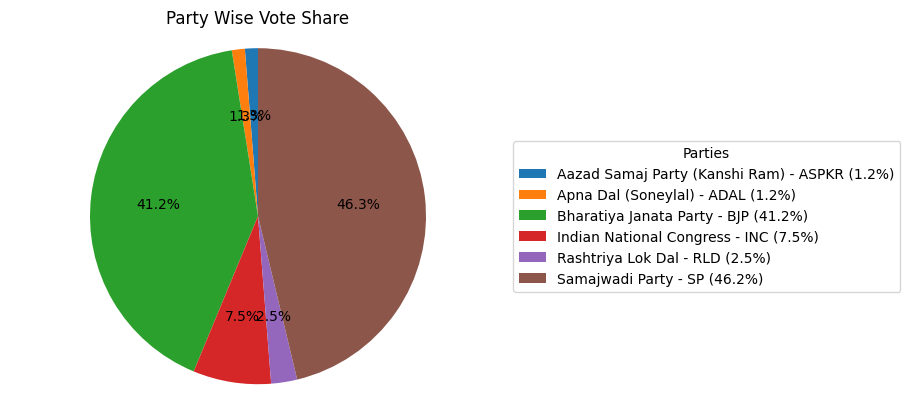

In [162]:

df_up['Total'] = pd.to_numeric(df_up['Total'], errors='coerce')
party_vote_share = df_up.groupby('Party')['Total'].sum()
colors = plt.cm.tab20(range(len(party_vote_share)))
plt.pie(party_vote_share,  autopct='%1.1f%%', startangle=90)
plt.title('Party Wise Vote Share')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
labels = [f"{party} ({percentage:.1f}%)" for party, percentage in zip(party_vote_share.index, party_vote_share / party_vote_share.sum() * 100)]

plt.legend(labels, title="Parties", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


In [163]:
df_up['Won'] = pd.to_numeric(df_up['Won'], errors='coerce')

party_win_percent = df_up.groupby('Party')['Won'].sum() / df_up['Won'].sum() * 100
print(party_win_percent)

Party
Aazad Samaj Party (Kanshi Ram) - ASPKR     1.25
Apna Dal (Soneylal) - ADAL                 1.25
Bharatiya Janata Party - BJP              41.25
Indian National Congress - INC             7.50
Rashtriya Lok Dal - RLD                    2.50
Samajwadi Party - SP                      46.25
Name: Won, dtype: float64


In [169]:
df_up['Leading'] = pd.to_numeric(df_up['Leading'], errors='coerce')
df_up['Won'] = pd.to_numeric(df_up['Won'], errors='coerce')
df_up['Lead Margin'] = df_up['Won'] -  df_up['Leading']
print(df_up[['Party', 'Lead Margin']])

                                    Party  Lead Margin
0                    Samajwadi Party - SP           37
1            Bharatiya Janata Party - BJP           33
2          Indian National Congress - INC            6
3                 Rashtriya Lok Dal - RLD            2
4  Aazad Samaj Party (Kanshi Ram) - ASPKR            1
5              Apna Dal (Soneylal) - ADAL            1


In [170]:
party_vote_share = df_up.groupby('Party')['Total'].sum() / df_up['Total'].sum() * 100
print(party_vote_share)

Party
Aazad Samaj Party (Kanshi Ram) - ASPKR     1.25
Apna Dal (Soneylal) - ADAL                 1.25
Bharatiya Janata Party - BJP              41.25
Indian National Congress - INC             7.50
Rashtriya Lok Dal - RLD                    2.50
Samajwadi Party - SP                      46.25
Name: Total, dtype: float64


In [171]:



csv_filename = 'statewiseresult.csv'
df_up.to_csv(csv_filename, index=False)
print(f"DataFrame saved to {csv_filename}")


DataFrame saved to statewiseresult.csv


In [184]:


url_cd = "https://results.eci.gov.in/PcResultGenJune2024/candidateswise-S015.htm"
response = requests.get(url_cd)
soup = BeautifulSoup(response.content, 'html.parser')
soup





<!DOCTYPE html>

<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=7" http-equiv="X-UA-Compatible"/>
<meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="0" http-equiv="Expires"/>
<meta content="300" http-equiv="refresh"/>
<!-- Bootstrap CSS -->
<link href="css/bootstrap.min.css" rel="stylesheet"/>
<link href="css/custom.css" rel="stylesheet"/>
<link href="css/responsive.css" rel="stylesheet"/>
<link href="css/font.css" rel="stylesheet"/>
<link href="img/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<title>Election Commission of India</title>
<script>!function(a){var e="https://s.go-mpulse.net/boomerang/",t="addEventListener";if("False"=="True")a.BOOMR_config=a.BOOMR_config||{},a.BOOMR_config.PageParams

In [188]:


cand_info_elements = soup.find_all(class_="cand-info")
for element in cand_info_elements:

  print(element)


<div class="cand-info">

<div class="nme-prty">
<h5>C.M.RAMESH</h5>
<h6>Bharatiya Janata Party</h6>
</div>
<div class="status won">
<div style="text-transform: capitalize">won</div>
<div>762069 <span>(+ 296530)</span></div>
</div></div>
<div class="cand-info">
<div class="status lost">
<div style="text-transform: capitalize">lost</div>
<div>465539 <span>( -296530)</span></div>
</div>
<div class="nme-prty">
<h5>BUDI MUTYALA NAIDU</h5>
<h6>Yuvajana Sramika Rythu Congress Party</h6>
</div>
</div>
<div class="cand-info">
<div class="status lost">
<div style="text-transform: capitalize">lost</div>
<div>25651 <span>( -736418)</span></div>
</div>
<div class="nme-prty">
<h5>VEGI VENKATESH</h5>
<h6>Indian National Congress</h6>
</div>
</div>
<div class="cand-info">
<div class="status lost">
<div style="text-transform: capitalize">lost</div>
<div>19157 <span>( -742912)</span></div>
</div>
<div class="nme-prty">
<h5>PALAKA SREERAMA MURTHY</h5>
<h6>Bahujan Samaj Party</h6>
</div>
</div>
<div class